     Задача 5.1. Дана функция y = f(x). Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. Степень многочлена N подобрать экспериментально  таким образом, чтобы максимальная величина погрешности на отрезке [a,b]  не превышала заданной величины ε=10^(-6) . Построить графики функции,  многочлена  и график погрешностей.

1.1. Задать:  исходный отрезок  ,   - число отрезков разбиения (для начала   взять произвольно)  и  функцию f(x). Функцию  f(x) взять из таблицы 5.1, сняв  знак модуля,
 входящий в выражение для функции.


$ f(x) = (x+1) * |x^2-2|$  [a,b] = [0, 2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
N = 4

In [ ]:
def func(x):
    return (x + 1) * (x * x - 2)

vectorize_func = np.vectorize(func)

In [590]:
localization_segment_x = np.linspace(0,2, N)

In [591]:
localization_segment_y = vectorize_func(localization_segment_x)

In [592]:
def interpolation_polynomial(localization_segment_y, localization_segment_x, x, N):
    res = np.array([localization_segment_y[i] for i in range(N)], dtype = "float64")
    for i in range(N):
        for j in range(N):
            if i != j:
                res[i] *= (x-localization_segment_x[j])
                res[i] /= (localization_segment_x[i] - localization_segment_x[j])
    return sum(res)
        

In [593]:
def get_error():
    return [np.abs(interpolation_polynomial(localization_segment_y, localization_segment_x, elem, N) - func(elem)) for elem in np.linspace(0,2,1000)]

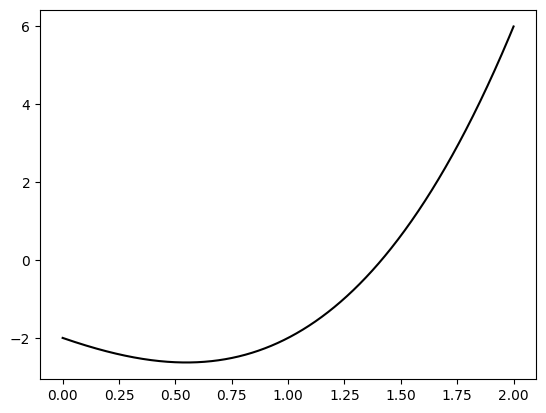

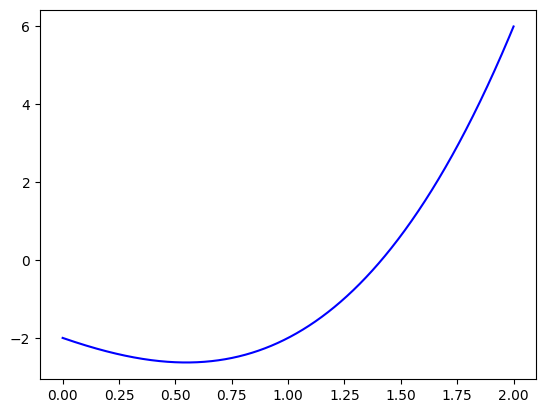

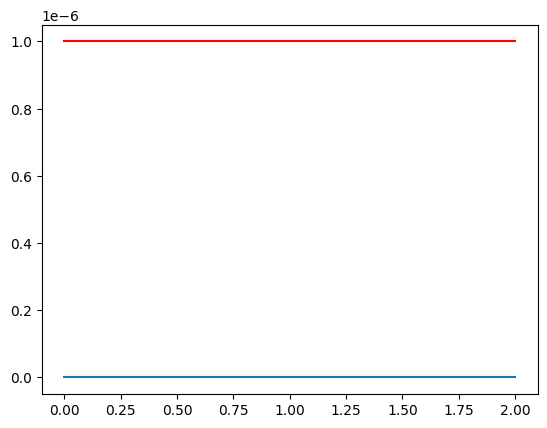

In [594]:
tmp_linspace = np.linspace(0,2,1000)

plt.plot(tmp_linspace, vectorize_func(tmp_linspace), color = "black")
plt.show()
plt.plot(tmp_linspace, [interpolation_polynomial(localization_segment_y, localization_segment_x, elem, N) for elem in tmp_linspace], color = "blue")
plt.show()
plt.plot(tmp_linspace, [1e-6 for _ in range(1000)], color= "red")
plt.plot(tmp_linspace, get_error())
plt.show()

### Задание 5.3 ###

В таблице  5.2  приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2000 г.г. Заполнить последние два столбца таблицы (взять сведения из интернета).  На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.  Найти численность  населения страны  в 2023 году  и сравнить полученное значение  с актуальным значением  (взять из интернета).
Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г и выполнить прогноз на 2023 год.  Сравнить с актуальными данными.  Составить отчет по задаче.


In [ ]:
def get_factors_mnk(n, x):
    res = [sum([elem ** k for elem in x]) for k in range(2*n)]
    return res

In [596]:
N = 4
Belarus_population_on_year = [7.7, 8.1, 8.9, 9.6, 10.2, 10.1, 9.7, 9.6]
tmp_linspace = np.linspace(1950,2030,1000)

In [597]:
matrix = [[get_factors_mnk(N,year)[i + j] for i in range(N)] for j in range(N)]
res_vector = [sum([Belarus_population_on_year[i] * year[i] ** k for i in range(N*2)]) for k in range(N)]
def get_val (res, x):
    return res[0] + res[1] * x + res[2] * x * x + res[3] * x * x * x

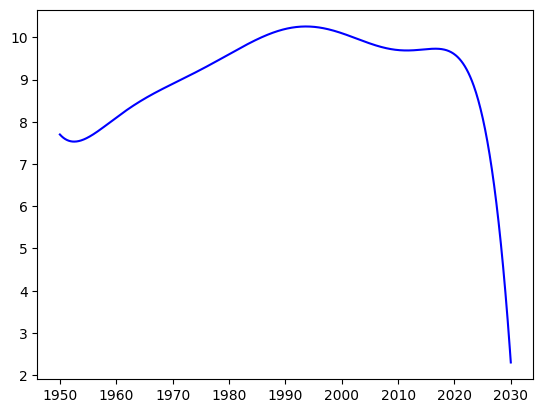

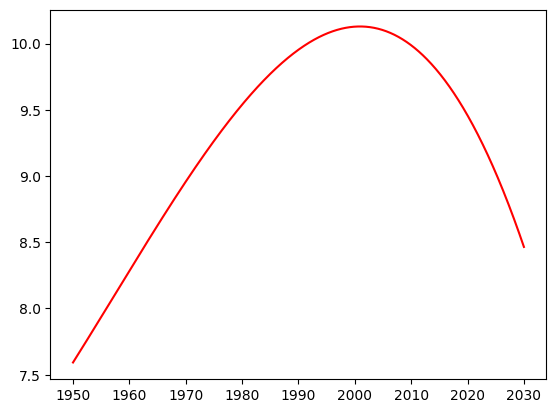

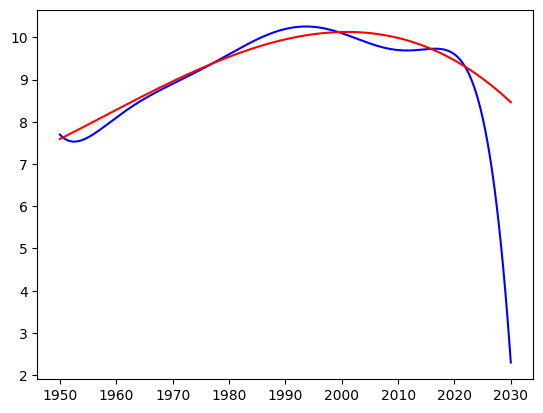

In [598]:
Belarus_population_on_year = [7.7, 8.1, 8.9, 9.6, 10.2, 10.1, 9.7, 9.6]
tmp_linspace = np.linspace(1950,2030,1000)
year = [1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0 ,2010.0, 2020.0]
plt.plot(tmp_linspace, [interpolation_polynomial(Belarus_population_on_year, year, elem, 8) for elem in tmp_linspace], color = "blue")
plt.show()
plt.plot(tmp_linspace, [get_val(np.linalg.solve(matrix, res_vector), x) for x in tmp_linspace], color = "red")
plt.show()
plt.plot(tmp_linspace, [interpolation_polynomial(Belarus_population_on_year, year, elem, 8) for elem in tmp_linspace], color = "blue")
plt.plot(tmp_linspace, [get_val(np.linalg.solve(matrix, res_vector), x) for x in tmp_linspace], color = "red")
plt.show()